In [6]:
# Import Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix 
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

In [13]:
# Reading an Excel file into a DataFrame using the read_excel function
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)

In [15]:
# Displaying the first few rows of the DataFrame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
# Renaming a specific column in the DataFrame
df.rename({'default payment next month':'Default'}, axis='columns', inplace=True)

# Displaying the first few rows of the DataFrame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# Dropping a specific column from the DataFrame
df.drop('ID', axis=1, inplace=True)

# Displaying the first few rows of the DataFrame
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Missing Data

In [19]:
# Displaying the data types of each column in the DataFrame
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

In [22]:
# Extracting and displaying the unique values in the column
df.SEX.unique()

array([2, 1])

In [23]:
# Extracting and displaying the unique values in the column
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [24]:
# Extracting and displaying the unique values in the column
df.MARRIAGE.unique()

array([1, 2, 3, 0])

In [28]:
# calculates the number of rows in the DataFrame where either 
#the 'EDUCATION' column or the 'MARRIAGE' column has a value of 0
len(df[(df.EDUCATION==0)
       |
      (df.MARRIAGE ==0)])

68

In [29]:
# Creating a new DataFrame without rows where 'EDUCATION' or 'MARRIAGE' is equal to 0
df_no_missing = df[(df.EDUCATION !=0)
                  &
                  (df.MARRIAGE !=0)]
df_no_missing

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [31]:
# Extracting and displaying the unique values in the 'EDUCATION' column of df_no_missing
df_no_missing.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6])

In [33]:
# Extracting and displaying the unique values in the 'MARRIAGE' column of df_no_missing
df_no_missing.MARRIAGE.unique()

array([1, 2, 3])

In [34]:
# Creating a new DataFrame without default
df_no_default = df_no_missing[df_no_missing['Default']==0]

# Creating a new DataFrame with default
df_default = df_no_missing[df_no_missing['Default']==1]

In [36]:
# Downsampling the df_no_default DataFrame
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)

# Checking the length of the downsampled DataFrame
len(df_no_default_downsampled)

1000

In [40]:
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)
len(df_default_downsampled)

1000

In [50]:
# Downsampling the df_default DataFrame
df_downsample = pd.concat([ df_no_default_downsampled, df_default_downsampled])

# Checking the length of the downsampled DataFrame
len(df_downsample)

2000

# Split dependant and independant variables

In [51]:
X= df_downsample.drop('Default', axis=1).copy()
y= df_downsample.Default.copy()

print('X:', '\n', X.head(), '\n')
print('y:', '\n', y.head())

X: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
641       130000    2          3         1   28      0      0      0      0   
4678      170000    1          3         1   29      0      0      0      0   
16004     180000    2          2         1   29      0      0      0      0   
22974     210000    2          2         2   32     -2     -2     -2     -2   
17535     190000    2          3         1   45      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
641       -2  ...      50000          0          0          0      2500   
4678       0  ...     172307      35234      32869      33862      7200   
16004      0  ...      26310      26662      26166      26176      1800   
22974     -2  ...        410          0          0          0       979   
17535      0  ...      80548      81778      83082      84811      3300   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
641        

In [53]:
# Creating a OneHotEncoder object
ohe = OneHotEncoder(sparse=False)

# Specifying the categorical column names and prefixes
col_names = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]
col_prefixes=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]

# Performing one-hot encoding on selected columns
dummy_cols = ohe.fit_transform(X[col_names])

# Getting the feature names for the one-hot encoded columns
dummy_names=ohe.get_feature_names(col_prefixes)

# Creating a DataFrame with the one-hot encoded columns
dummy_cols=pd.DataFrame(dummy_cols, columns=dummy_names, dtype=int)

# Concatenating the original DataFrame with the one-hot encoded columns and dropping the original categorical columns
X_encoded = pd.concat([X.reset_index(drop=True),dummy_cols.reset_index(drop=True)], axis=1)
X_encoded = X_encoded.drop(col_names, axis = 1)
X_encoded


/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
1,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
2,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
3,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
4,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,30000,34,24022,24744,24053,25624,25977,25413,1396,0,...,0,0,0,0,1,0,0,0,0,0
1996,320000,43,18625,28143,32159,31851,3105,-45,10000,5000,...,0,0,0,1,0,0,0,0,0,0
1997,50000,23,2165,14796,20816,11804,1420,0,15000,20300,...,0,0,1,0,0,0,0,0,0,0
1998,150000,43,18308,19973,21000,22013,22449,22922,1973,1353,...,0,0,0,1,0,0,0,0,0,0


# Center and Scaling

In [56]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Scaling the feature variables for the training set
X_train_scaled = scale(X_train)

# Scaling the feature variables for the testing set
X_test_scaled = scale(X_test)

# Preliminary SVM

In [95]:
# Creating an SVC model with probability estimates enabled and a specified random seed
clf_svm = SVC(probability=True, random_state =42).fit(X_train_scaled, y_train)

In [97]:
def plot_roc_curve(fpr, tpr, roc_auc):
    # Plotting the ROC curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    
    # Adding legend and a diagonal reference line
    plt.legend(loc = 'lower right')
    
    # Setting the axis limits and labels
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    # Displaying the plot
    plt.show()

In [98]:
def eval_model(model, x_test, y_test):
    # Make predictions and obtain probabilities
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    # Compute and display confusion matrix
    conf_mat = confusion_matrix(y_test, preds)
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()
    
    # Calculate and display evaluation metrics
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    # Display ROC curve and AUC
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)
    plot_roc_curve(fpr, tpr, roc_auc)

    # Create a DataFrame to store results
    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    # Plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.title('Distribution of Probabilities for Estimated Classes')
    plt.legend(loc='best')
    plt.show()
    
    # Display the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


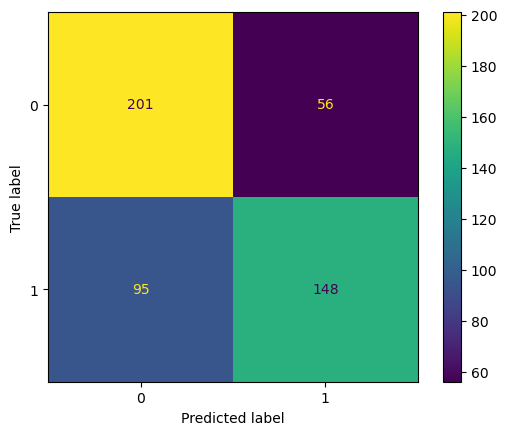



Accuracy:  0.698
Precision:  0.7254901960784313
Recall:  0.6090534979423868
F1:  0.6621923937360179
AUC:  0.7186754415461722


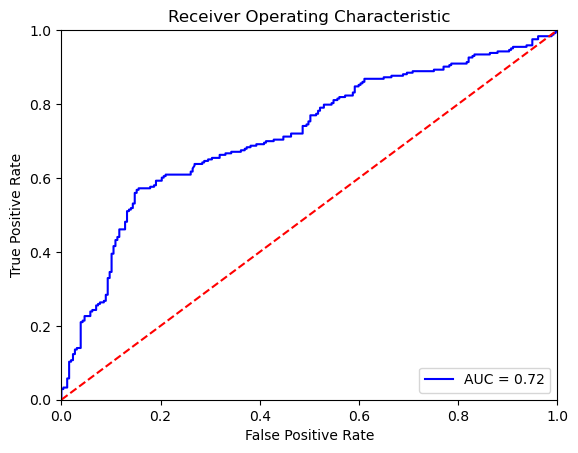

/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_68879/1825695334.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_68879/1825695334.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gi

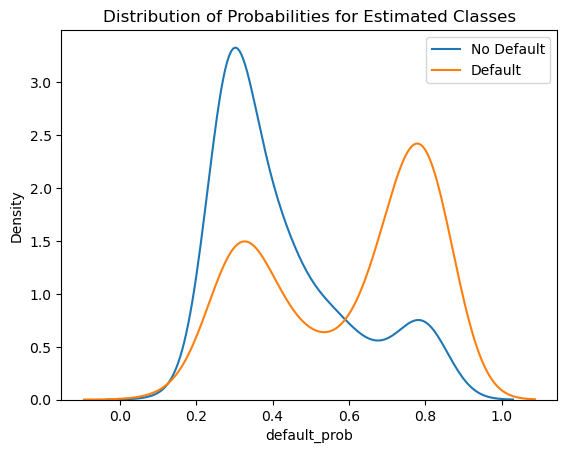

true_class  predicted_class
0           0                  0.782101
            1                  0.217899
1           1                  0.609053
            0                  0.390947
Name: predicted_class, dtype: float64


In [99]:
eval_model(clf_svm, X_test_scaled, y_test)

# Cross Validation n GridSearchCV

In [103]:
# Define the parameter grid for the grid search
param_grid = [
    {'C':[0.5,1,10,100],
    'gamma':['scale', 1,0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']}
]

# Create an instance of GridSearchCV
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
    )

# Fit the grid search to the training data
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


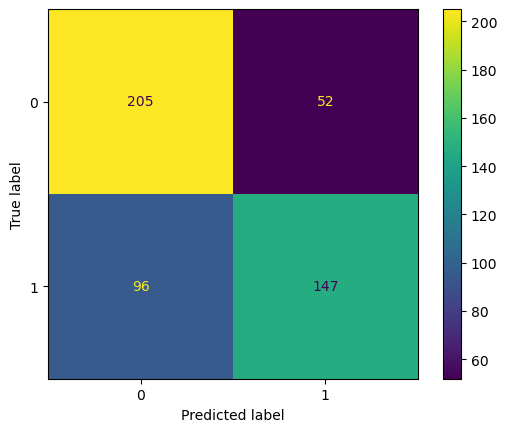



Accuracy:  0.704
Precision:  0.7386934673366834
Recall:  0.6049382716049383
F1:  0.665158371040724
AUC:  0.7289955324974781


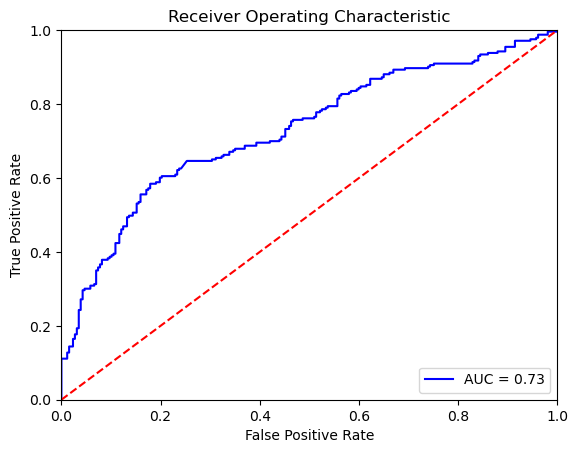

/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_68879/1825695334.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_68879/1825695334.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gi

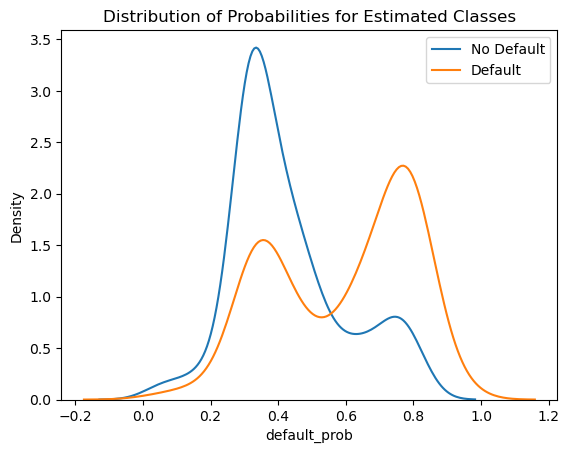

true_class  predicted_class
0           0                  0.797665
            1                  0.202335
1           1                  0.604938
            0                  0.395062
Name: predicted_class, dtype: float64


In [105]:
# SVM model with specified hyperparameters and probability estimates enabled
clf_svm=SVC(probability=True, C=100, gamma=0.001, random_state=42).fit(X_train_scaled, y_train)

eval_model(clf_svm, X_test_scaled, y_test)

# PCA Principal Component Analysis

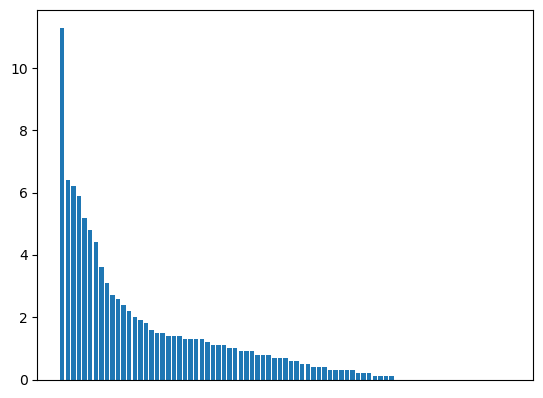

In [122]:
# Create a PCA instance
pca = PCA()

# Fit and transform the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the percentage of explained variance for each principal component
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

# Create labels for the principal components
labels=[str(x) for x in range(1, len(per_var)+1)]

# Plot a bar chart to visualize the explained variance
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False);


In [123]:
# Extract the first two principal components from the PCA-transformed training data
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

# Stack the first two principal components horizontally
pca_train_scaled = scale(np.column_stack([train_pc1_coords, train_pc2_coords]))

# Define the parameter grid for the grid search
param_grim = [
    {'C':[1,10,100,1000],
    'gamma':['scale', 1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']}
]

# Create an instance of GridSearchCV
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

# Fit the grid search to the PCA-transformed and scaled training data
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


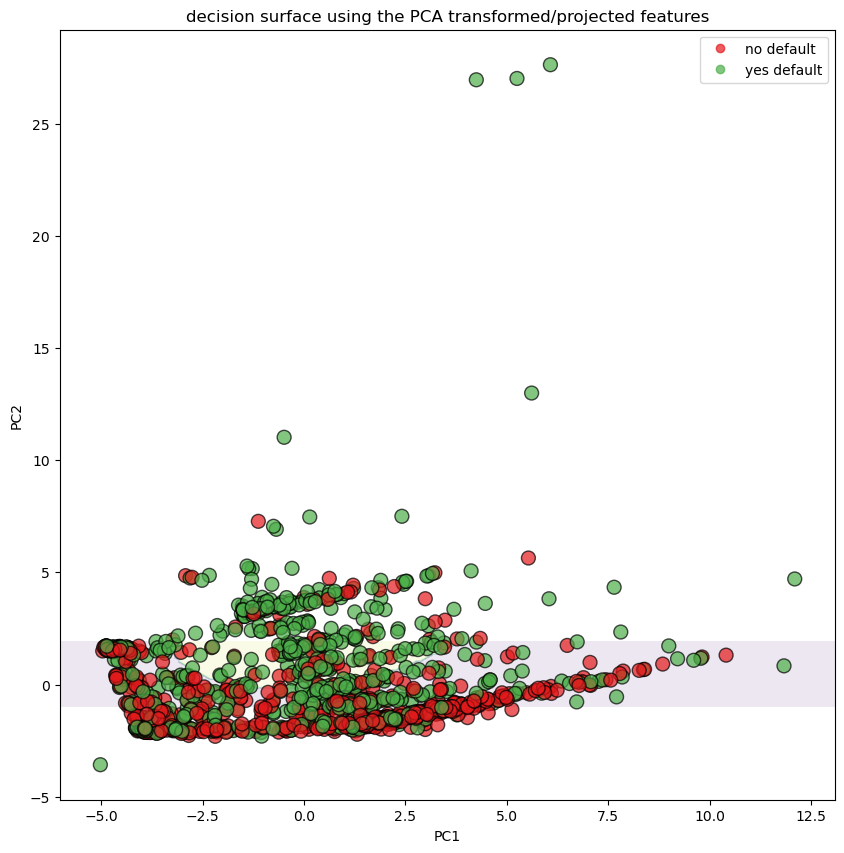

In [145]:
# Train an SVM model with specified hyperparameters on the PCA-transformed and scaled training data
clf_svm=SVC(probability=True, C=10, gamma=0.01, random_state=42).fit(pca_train_scaled, y_train)

# Transform the scaled test data using PCA
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

# Stack the first two principal components horizontally and scale the test data
pca_test_scaled = scale(np.column_stack([test_pc1_coords, test_pc2_coords]))

# Define the range for the decision surface plo
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1
y_min = y_test.min()-1
y_max = y_test.max()+1

# Create a meshgrid for the decision surface
xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))

# Predict the labels for each point in the meshgrid
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# Plot the decision surface
fig, ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,Z,alpha=0.1)

# Define a colormap for the scatter plot
cmap=colors.ListedColormap(['#e41a1c', '#4daf4a'])

# Scatter plot the PCA-transformed test data with different colors for each class
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

# Create a legend for the scatter plot
legend= ax.legend(scatter.legend_elements()[0],
                 scatter.legend_elements()[0],
                 loc='upper right')
legend.get_texts()[0].set_text('no default')
legend.get_texts()[1].set_text('yes default')

# Set axis labels and title for the plot
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('decision surface using the PCA transformed/projected features')

plt.show;

